In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import os

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)
formatter = ticker.ScalarFormatter(useMathText=True)

# Binary data

In [ ]:
manila = pd.read_csv('manila_binary/measures.csv')
our = pd.read_csv('our_approach_binary/measures.csv')
aequitas = pd.read_csv('aequitas_binary/measures.csv')
manila_time = pd.read_fwf('manila_binary/times.txt', header=None)
manila["time"] = manila_time
our_time = pd.read_fwf('our_approach_binary/times.txt', header=None)
our['time'] = our_time
aequitas_time = pd.read_fwf('aequitas_binary/times.txt', header=None)
aequitas['time'] = aequitas_time
manila['approach'] = 'Manila'
aequitas['approach'] = 'Aequitas'
our['approach'] = 'Our approach'
full = pd.concat([manila, aequitas, our])

## CPU Consumption

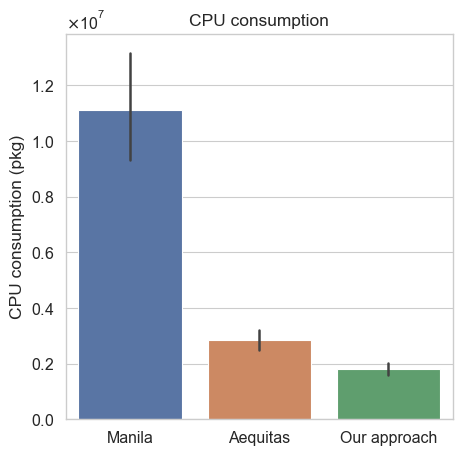

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x='approach', y='pkg', hue='approach', ax=ax)
ax.set_ylabel('CPU consumption (pkg)')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(formatter)
plt.title('CPU consumption')
plt.savefig('pkg.png', dpi=300, bbox_inches='tight')
plt.show()

## Execution time

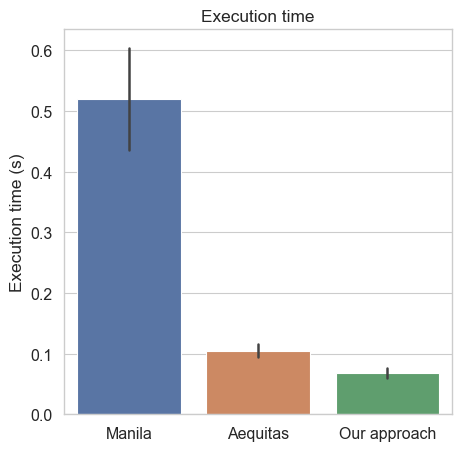

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
plt.title("Execution time")
plt.savefig("time.png", dpi=300, bbox_inches="tight")
plt.show()

# Binary and multi-class datasets

In [19]:
manila = pd.read_csv("manila_full/measures.csv")
our = pd.read_csv("our_approach_full/measures.csv")
manila_time = pd.read_fwf("manila_full/times.txt", header=None)
manila["time"] = manila_time
our_time = pd.read_fwf("our_approach_full/times.txt", header=None)
our["time"] = our_time
manila["approach"] = "Manila"
our["approach"] = "Our approach"
full = pd.concat([manila, our])

## CPU consumption

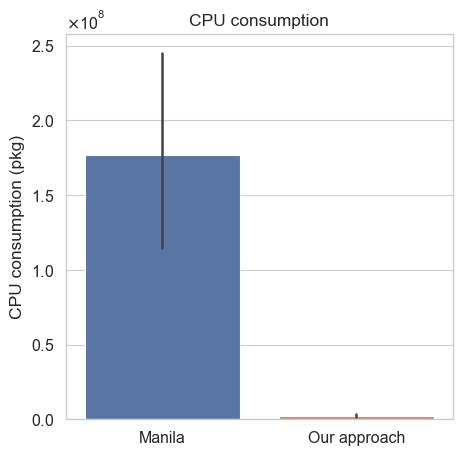

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x="approach", y="pkg", hue="approach", ax=ax)
ax.set_ylabel("CPU consumption (pkg)")
ax.set_xlabel("")
ax.yaxis.set_major_formatter(formatter)
plt.title("CPU consumption")
plt.show()

## Training time

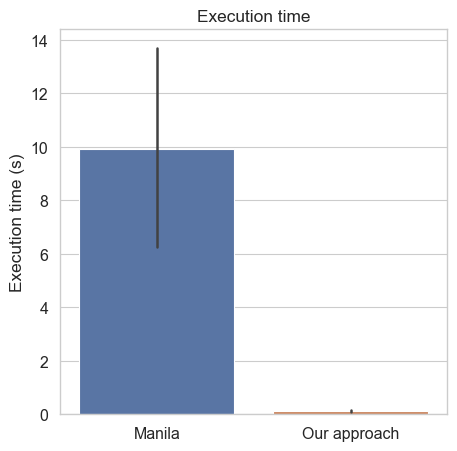

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
plt.title("Execution time")
plt.savefig("time.png", dpi=300, bbox_inches="tight")
plt.show()

## Prediction comparison

In [103]:
def map_values(x):
  if x > 0.2:
    return 1
  else: 
    return 0

manila = pd.DataFrame()
for file in os.listdir('manila_baseline/manila_results/'):
  manila = pd.concat([manila, pd.read_csv(f'manila_baseline/manila_results/{file}', index_col=0)[['stat_par', 'eq_odds', 'ao']]])
manila = manila.map(map_values)

In [104]:
our = pd.DataFrame()
for file in os.listdir('our_approach/our_approach_results/'):
    our = pd.concat(
        [
            our,
            pd.read_csv(f"our_approach/our_approach_results/{file}", index_col=0)
        ]
    )

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
print('Statistical parity', accuracy_score(manila['stat_par'], our['0']))

Statistical parity 0.34782608695652173


In [107]:
print("Equal opportunity", accuracy_score(manila["eq_odds"], our["1"]))

Equal opportunity 0.6086956521739131


In [109]:
print("Average odds", accuracy_score(manila["ao"], our["2"]))

Average odds 0.6521739130434783


## Aequitas

In [112]:
aequitas = pd.DataFrame()
for file in os.listdir('aequitas/aequitas_results/'):
    aequitas = pd.concat(
        [
            aequitas,
            pd.read_csv(f"aequitas/aequitas_results/{file}", index_col=0)[['tpr', 'fpr']]
        ]
    )
aequitas['ao'] = aequitas['tpr'] - aequitas['fpr']

In [117]:
aequitas = aequitas.loc[0]
aequitas = aequitas.map(map_values)